## 影像處理與機器人視覺: 基礎設計HW2

In [1]:
import numpy as np
import cv2
from numpy.linalg import inv
from matplotlib import pyplot as plt

In [2]:
def warpAffine(img,affine_martix,width,high,channel):
    srouce_y,srouce_x=np.indices(img.shape[:2])
    srouce_points=np.stack((srouce_x.ravel(),srouce_y.ravel(),np.ones(srouce_y.size))).astype(int)
    destination_points=np.round(np.dot(affine_martix,srouce_points)).astype(int)
    #建立相同大小空矩陣
    img_martix=np.zeros([width,high,channel])
    #矩陣維度,矩陣元素
    dimension,element=destination_points.shape
    for i in range(3):
        for j in range(element):
            destination_1,destination_2=destination_points[0,j],destination_points[1,j]
            srouce_1,srouce_2=srouce_points[0,j],srouce_points[1,j]
            if 0<destination_1<high and 0<=destination_2<width:
                img_martix[destination_2,destination_1,i]=img[srouce_2,srouce_1,i]
    affine_result=img_martix.astype(int)
    return affine_result

def affine_processing(img_path,x_vaule,y_vaule):
    img=cv2.imread(img_path)
    width, high, channel= img.shape

    #來源影像(眼睛左、眼睛右、鼻子)
    srouce_par=np.float32([[x_vaule[0],y_vaule[0]],[x_vaule[1],y_vaule[1]],[x_vaule[2],y_vaule[2]]])
    #畫圖
    cv2.circle(img,(x_vaule[0], y_vaule[0]), 6, (255, 255, 0), -1)
    cv2.circle(img,(x_vaule[1], y_vaule[1]), 6, (255, 255, 0), -1)
    cv2.circle(img,(x_vaule[2], y_vaule[2]), 6, (255, 255, 0), -1)


    #固定位置的template ，要加上位移0.5
    destination_par=np.float32([[65+0.5,90+0.5],[95+0.5,90+0.5],[80+0.5,120+0.5]])
    #affine 矩陣
    affine_martix=cv2.getAffineTransform(srouce_par,destination_par)
    
    #affine結果
    # affine_result=cv2.warpAffine(img,affine_martix,(160,190))
    
    #取代cv的warp
    affine_result=warpAffine(img,affine_martix,160,190,3)
    #存檔
    file_name=img_path.split('/')
    output_path='./output_img/'+file_name[-1]
    cv2.imwrite(output_path,affine_result)
    
    plt.subplot(131)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(affine_result[:,:,::-1])
    plt.axis('off')
    plt.show()

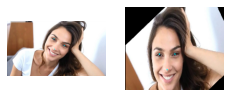

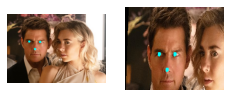

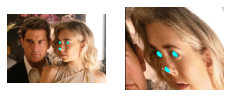

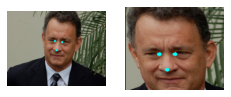

In [3]:
affine_processing('./input_img/img1.jpg',[649,790,655],[256,349,399])

affine_processing('./input_img/img2.jpg',[119,177,150],[152,154,192])

affine_processing('./input_img/img3.jpg',[283,325,283],[157,158,191])

affine_processing('./input_img/img4.jpg',[276,317,285],[173,179,226])